In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os



In [57]:
prediction = np.loadtxt("../predictions.txt", dtype=str)
truth = np.loadtxt("../truth.txt", dtype=str)

In [58]:
for i in range(len(truth)):
    if (truth[i] == 'Sith'):
        truth[i] = 0
    else:
        truth[i] = 1

for i in range(len(prediction)):
    if (prediction[i] == 'Sith'):
        prediction[i] = 0
    else:
        prediction[i] = 1

In [75]:
def getConfusionMatrix(truth: np.array, pred: np.array):
    Tp = Tn = Fp = Fn = 0
    for i in range(len(truth)):
        if (truth[i] == "0" and pred[i] == "0"):
            Tn += 1
        elif (truth[i] == "0" and pred[i] == "1"):
            Fp += 1
        elif (truth[i] == "1" and pred[i] == "1"):
            Tp += 1
        elif (truth[i] == "1" and pred[i] == "0"):
            Fn += 1
    accuracy = (Tp + Tn) / (Tp + Tn + Fp + Fn)
    pres = (Tp / (Tp + Fp))
    recall = (Tp / (Tp + Fn))
    f1_score = (2 * Tp) / (2 * Tp + Fp + Fn)
    return [[Tp, Fn], [Fp, Tn]]

In [76]:
conf_matrix = getConfusionMatrix(truth, prediction)


In [77]:
print(conf_matrix)

[[25, 24], [30, 21]]


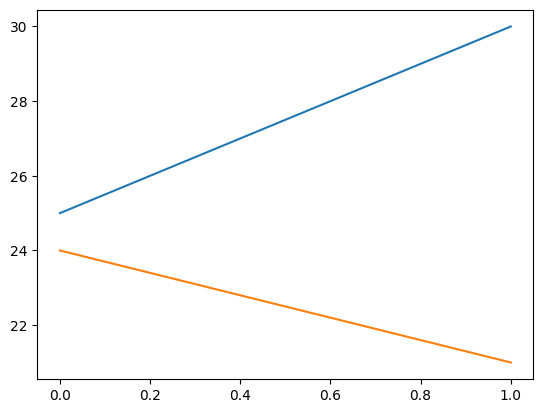

In [78]:
plt.plot(conf_matrix)

In [65]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(truth, prediction)

In [67]:
print(conf)

[[21 30]
 [24 25]]
